In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter

# Problum Statement

<p>
Netflix hopes to detect patterns in its content inventory in order to improve its production and acquisition strategies. In particular, the firm wants to know which sorts of material are most popular with viewers and where it should focus its efforts in terms of worldwide development and new content production.
<br>
Basic Metrics Analysis: To begin analysing the Netflix dataset, we may look at some fundamental metrics to determine the content library's composition. These are some crucial metrics and what they indicate:
</p>
<ol>
<li> Number of Titles: The collection comprises almost 8807 titles, which include both movies and TV series. This suggests that Netflix has a large content library, which has most certainly contributed to its popularity. </li>
<li> Content Distribution by Type: The majority of the content on Netflix is movies, which account for nearly two-thirds of the titles. The remaining one-third is made up of television series. This indicates that, while Netflix provides a wide range of material, movies are the most popular. </li>
<li> Content Distribution by Country: The dataset offers information on the nations where titles are available. The United States has the most material (almost 5,000 titles), followed by India, the United Kingdom, and Canada. This suggests that while Netflix has a significant presence in certain places, it may have potential to grow its influence in others. </li>
<li> Most Popular Genres: Drama, Comedy, Thriller, Action, and Romance are the top five genres for movies on Netflix. The most popular TV show genres include drama, comedy, documentary, crime, and action. This informs us about which genres are most popular with viewers, which might help us decide what sorts of material to generate and buy. </li>
<li> Ratings: Each title is rated on a scale of 'PG-13', 'TV-MA', 'TV-MA' etc </li>
</ol>
<br>
We can begin to understand the nature of Netflix's content collection and uncover trends that might drive choices regarding content development and worldwide growth by evaluating these fundamental parameters.

## Load the data

In [2]:
data = pd.read_csv('./netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

In [3]:
"""
In data analysis, the shape of a dataframe refers to the number of rows and columns that the dataframe includes. In the format, it is often expressed as a tuple (number of rows, number of columns).

Knowing the shape of your dataframe is critical since it informs you about the size and structure of your data. This data may be used to establish the best data analysis methods, such as whether statistical tests or machine learning algorithms are most suited for the data.

Here as we see we have 8807 Records and 12 Columns / Features
"""

data.shape

(8807, 12)

In [4]:
""" 
The data.info() function is a method in pandas library used to display a concise summary of a DataFrame, including information about the data type of each column, the number of non-null values, and the memory usage. 


Specifically, it provides the following information:
1. The number of rows and columns in the dataframe
2. The name of each column and their data types (e.g. integer, float, object, etc.)
3. The number of non-null values in each column
"""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
"""
The resulting output is a DataFrame with the following statistics for each categorical column:

count: the number of non-missing values in the column.
unique: the number of unique values in the column.
top: the most frequently occurring value in the column.
freq: the frequency of the most frequently occurring value in the column.
This method is useful for understanding the distribution of categorical data within a DataFrame and can provide insight into potential data quality issues or anomalies.
"""

# for categorical values 

data.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [82]:
"""
The resulting output is a table that includes various summary statistics for each numerical column in the DataFrame, including:

count: the number of non-missing values in the column.
mean: the average value of the column.
std: the standard deviation of the column.
min: the minimum value in the column.
25%: the 25th percentile value in the column.
50%: the median value in the column.
75%: the 75th percentile value in the column.
max: the maximum value in the column.

"""
data.describe()

,release_year,month,year
count,8790.000000,8790.000000,8790.000000
mean,2014.183163,6.655859,2018.873606
std,8.825466,3.436103,1.573568
min,1925.000000,1.000000,2008.000000
25%,2013.000000,4.000000,2018.000000
50%,2017.000000,7.000000,2019.000000
75%,2019.000000,10.000000,2020.000000
max,2021.000000,12.000000,2021.000000


## Handling Missing Values :-

Missing value handling in a DataFrame is a critical task in data cleaning and preparation. Missing values can occur due to a variety of factors, including data entry errors, incomplete data, or data corruption.

Here are some thoughts on how to handle missing values in a DataFrame:

1. Identify missing values: Before dealing with missing values, it is critical to first identify them. The pandas library provides several methods to detect missing values, such as .isnull(), .notnull(), and .fillna ().

2. Choose a strategy: There are several strategies for dealing with missing values, depending on the data and the analysis goals. Using the.dropna() method to remove rows or columns with missing values is a common strategy. Another approach is to replace missing values with a reasonable estimate, such as the mean, median, or mode.

In [6]:
# looking for missing values

for i in data.columns:
    missing_values = data[i].isna().sum()
    if missing_values > 0 :
        print( f' {i} : {round(missing_values/data.shape[0] * 100 , 2) }%' )


 director : 29.91%
 cast : 9.37%
 country : 9.44%
 date_added : 0.11%
 rating : 0.05%
 duration : 0.03%


In [7]:
# handle missing values 

# fill the missing values 
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)

# drop the records that has missing values 
data.dropna(inplace= True)

data.shape

(8790, 12)

In [8]:
data["date_added"] = pd.to_datetime(data['date_added'])

data['month']=data['date_added'].dt.month
data['month_name']=data['date_added'].dt.month_name()
data['year'] = data['date_added'].dt.year


data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [9]:
# as we see here we do not have any missing value in our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month         8790 non-null   int64         
 13  month_name    8790 non-null   object        
 14  year          8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object

## Exploratory Data Analysis

### Visualise the categorical Value Distribution  

It is important to analyze the number of unique categorical variables in a dataframe because it provides insights into the diversity of the data and the potential complexity of the analysis.

Categorical variables are variables that take on a limited number of values, often representing discrete categories or groups. The number of unique categorical variables in a dataset can affect the choice of data analysis techniques and the interpretation of the results. 

For example:
<ol>
<li> Feature selection: If there are too many unique categorical variables in a dataset, it may be necessary to select a subset of them to avoid overfitting or to reduce computational complexity. </li>

<li> Data visualization: The number of unique categorical variables can also impact the type of data visualization techniques that can be used to explore the data. For instance, if there are many unique categorical variables, it may be challenging to visualize the relationships between them effectively. </li>

<li> Statistical analysis: The number of unique categorical variables can also influence the statistical methods that are appropriate for analyzing the data. For instance, if there are only a few unique categorical variables, a chi-square test may be sufficient, whereas if there are many unique categorical variables, more complex methods like multivariate logistic regression may be necessary. </li>
</ol>

Analyzing the number of unique categorical variables in a dataframe can help data analysts to make informed decisions about the data analysis approach, data visualization techniques, and the statistical methods to be used. By doing so, data analysts can obtain more accurate and meaningful insights from their data.

column name SHOW_ID
number of unique values are : 8790
Percentage of data that is Unique 100.0 % 
 

*****************************
column name TYPE
number of unique values are : 2
Percentage of data that is Unique 0.022753128555176336 % 
 

Distribution of Unique values 

Movie      6126
TV Show    2664
Name: type, dtype: int64


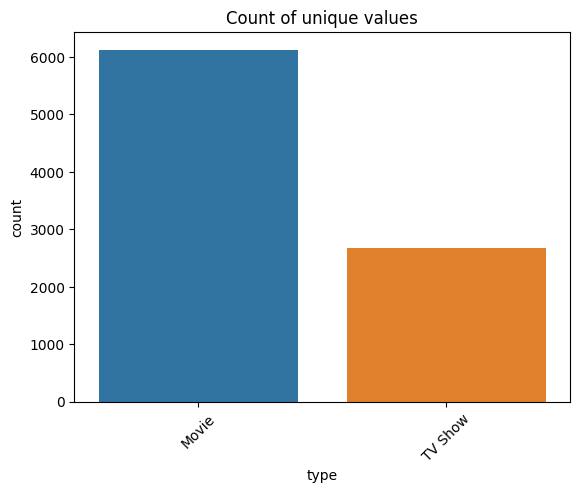

*****************************
column name TITLE
number of unique values are : 8790
Percentage of data that is Unique 100.0 % 
 

*****************************
column name DIRECTOR
number of unique values are : 4527
Percentage of data that is Unique 51.50170648464164 % 
 

*****************************
column name COUNTRY
number of unique values are : 748
Percentage of data that is Unique 8.509670079635951 % 
 

*****************************
column name RATING
number of unique values are : 14
Percentage of data that is Unique 0.15927189988623436 % 
 

Distribution of Unique values 

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


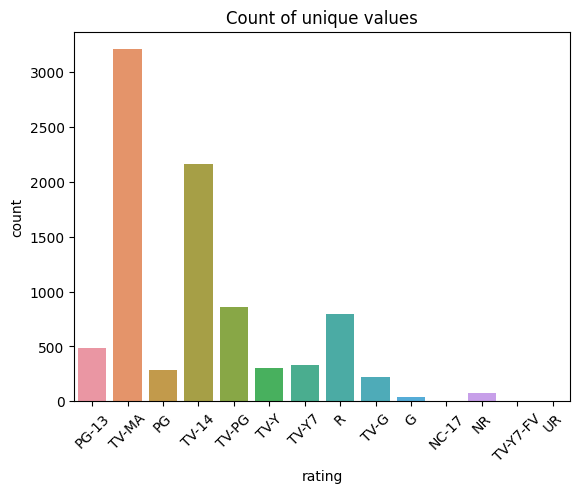

*****************************
column name DURATION
number of unique values are : 220
Percentage of data that is Unique 2.502844141069397 % 
 

*****************************
column name MONTH_NAME
number of unique values are : 12
Percentage of data that is Unique 0.13651877133105803 % 
 

Distribution of Unique values 

July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: month_name, dtype: int64


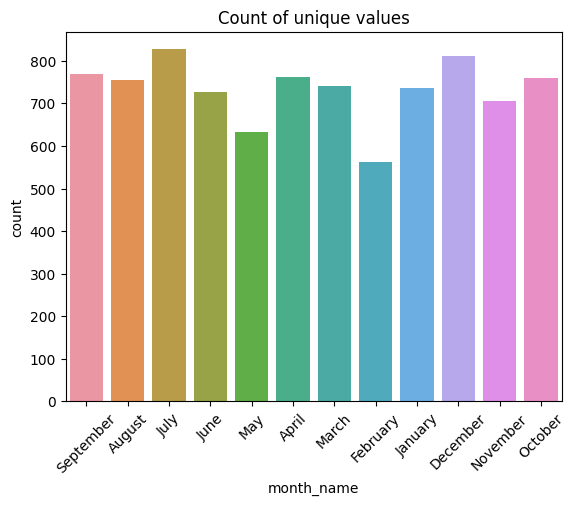

*****************************


In [10]:

# iterate trough every categorical column name except for cast, genre and description as they 

for col_name in  [ col for col in data.select_dtypes(np.object_).columns if col not in [ 'cast' ,'listed_in', 'description']] :

    print(f'column name {str.upper(col_name)}')
    print(f'number of unique values are : {data[col_name].nunique()}')
    nunique = data[col_name].nunique()/ data.shape[0] *100 
    print(f'Percentage of data that is Unique {nunique} % \n \n')

    # plot the unique values only if the number of unique values are in acceptable range 
    if nunique < 2 :
        print('Distribution of Unique values \n')
        print(data[col_name].value_counts())
        sns.countplot(data= data, x = col_name)
        plt.title('Count of unique values')
        plt.xticks(rotation = 45)
        plt.show()

    print("*****************************")


As we see from the above figures, we have type, rating and month_name within appreciatable range of unique values. 
    1. Looking at 'type' we see that we have more number of movie content on netflix 
    2. rating we have majority of the content for mature audience and for the audience above 14



Dropping a column that has all unique values and here are some reasons why dropping such a column may be considered:

1. Irrelevance: If a column contains all unique values, it may not provide any useful information for the analysis. In this case, dropping the column will not affect the results of the analysis and may even simplify it.

2. Reducing complexity: Dropping a column that has all unique values can simplify the data, especially if the column is large or adds little value to the analysis. This can make the data analysis and visualization easier to manage.

3. Saving computational resources: If a column contains all unique values, it may consume significant computational resources without adding much value to the analysis. Dropping such a column can reduce the memory requirements and processing time for the analysis.

### Top Country Of With The Most Amount Of Content On Netflix

                country
United States      3638
India               972
United Kingdom      418
Japan               243
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Egypt               106


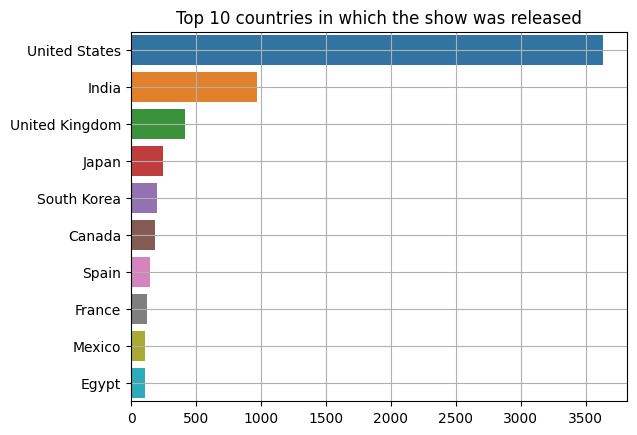

In [11]:
top_10_country_show_release = pd.DataFrame(data.country.value_counts())[:10]
print(top_10_country_show_release)
sns.barplot(y= top_10_country_show_release.index, x = top_10_country_show_release.values.reshape(1,-1)[0])
plt.title('Top 10 countries in which the show was released')
plt.grid(True)
plt.show()

Neflix has Massive Quantit Of United States Origined Content On Their Platform followed by India and United Kingdome

### Top 10 Most Popular and Least Popular genre on Netfilx

In [12]:
# extract the values of genre
genre=data["listed_in"]

# join all the values of the list 
genre=", ".join(genre)

# clean the nosy values
genre=genre.replace(',, ',', ')

# split the string 
genre=genre.split(", ")

# cout the number of times word repeats using Counter function 
genre= list(Counter(genre).items())


genre_counter = pd.DataFrame(genre, columns= ['genre', 'count']) 

# sort by ascending order 
genre_counter = genre_counter.sort_values('count', ascending= False)

genre_counter.head(10)

,genre,count
14,International Movies,2752
12,Dramas,2426
16,Comedies,1674
1,International TV Shows,1349
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,762
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


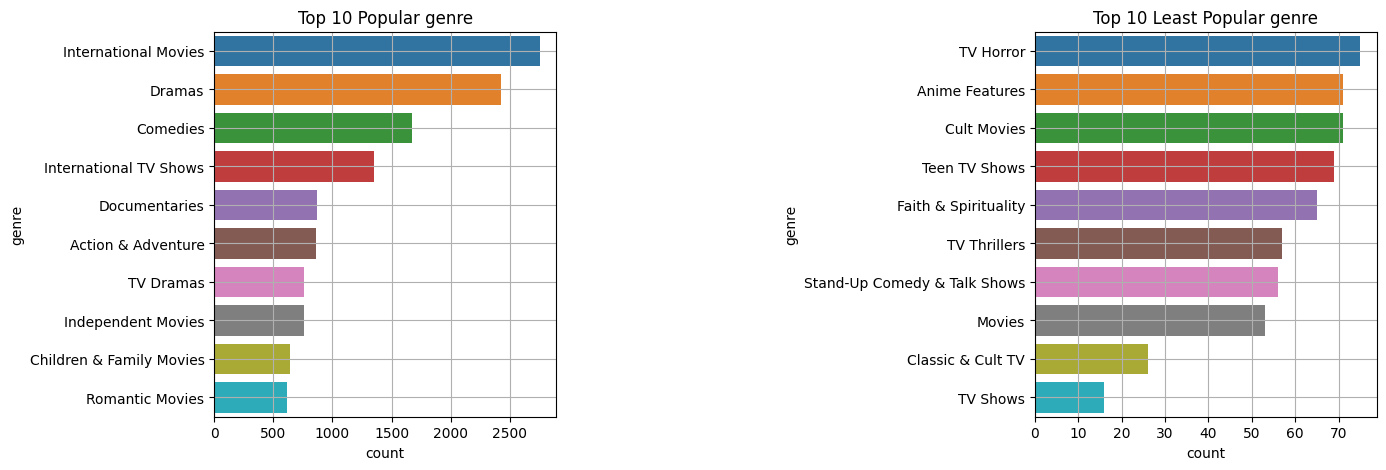

In [13]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data= genre_counter[:10] , x = 'count', y = 'genre')
plt.title('Top 10 Popular genre')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.barplot(data= genre_counter[-10:] , x = 'count', y = 'genre')
plt.title('Top 10 Least Popular genre')
plt.grid(True)

plt.show()

In general 'International movies', 'Dramas' and 'Comedies' are Popluar . 'Classic & Cult TV' , 'TV Thriller' and 'Faith & Spirutuality' are the lease popular 

#### Top 10 Most Popular and Least Popular Cast On Netflix

In [83]:
# extract the values of cast
cast=data["cast"]

# join all the values of the list 
cast=", ".join(cast)

# clean the nosy values
cast=cast.replace(',, ',', ')

# split the string 
cast=cast.split(", ")

# cout the number of times word repeats using Counter function 
cast= list(Counter(cast).items())


cast_counter = pd.DataFrame(cast, columns= ['cast', 'count']) 

# sort by ascending order 
cast_counter = cast_counter.sort_values('count', ascending= False)

# drop the 'No-Data'
cast_counter.drop(index= cast_counter[cast_counter['cast'] == 'No Data'].index, inplace= True)

cast_counter.head(10)

,cast,count
1434,Anupam Kher,43
783,Shah Rukh Khan,35
304,Julie Tejwani,33
4943,Takahiro Sakurai,32
1635,Naseeruddin Shah,32
305,Rupa Bhimani,31
11644,Om Puri,30
1559,Akshay Kumar,30
4469,Yuki Kaji,29
7423,Paresh Rawal,28


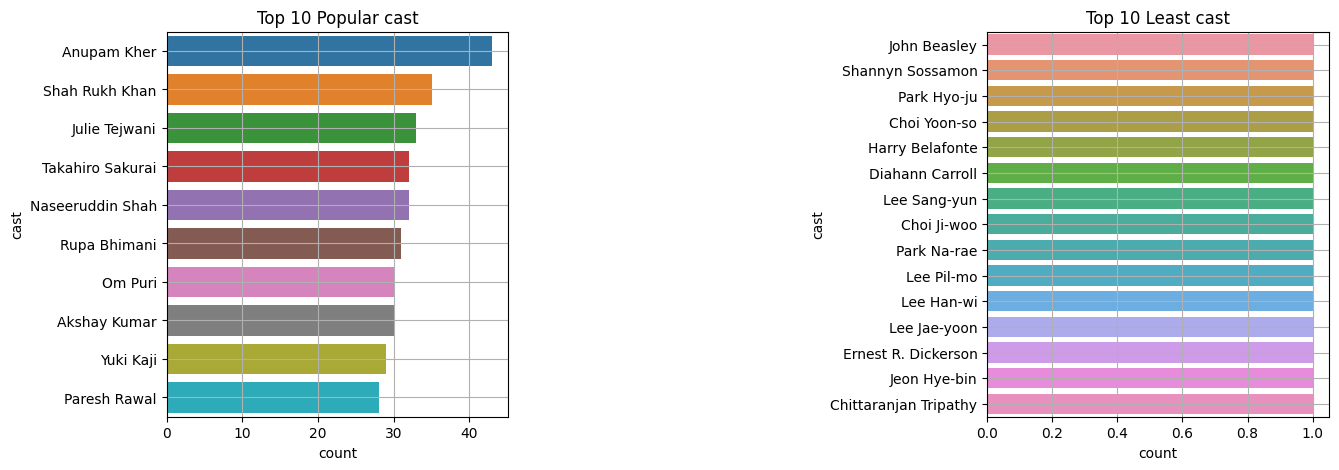

In [15]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data= cast_counter[:10] , x = 'count', y = 'cast')
plt.title('Top 10 Popular cast')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.barplot(data= cast_counter[-15:] , x = 'count', y = 'cast')
plt.title('Top 10 Leas Popular cast')
plt.grid(True)

plt.show()

'Anupam Kher' and 'Shah Rukh Khan' seems to be featured in majority of the content 

#### Analise top 5 Genra and Cast from top 3 counties i.e, USA, India, United Kingdom  

In [16]:
top_10_country_show_release.index[:3].to_list()

['United States', 'India', 'United Kingdom']

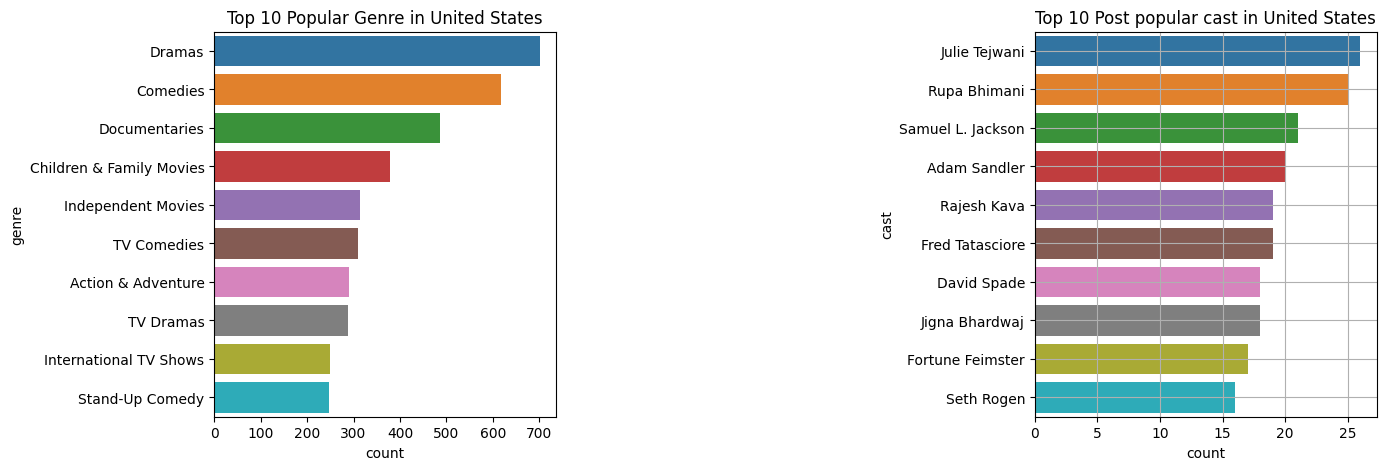

********************************************


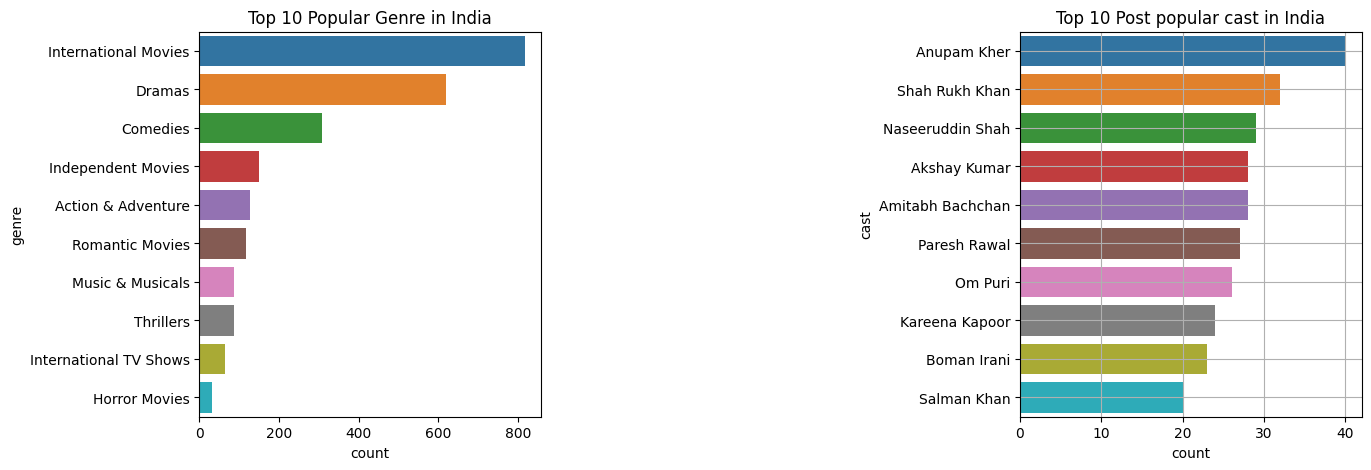

********************************************


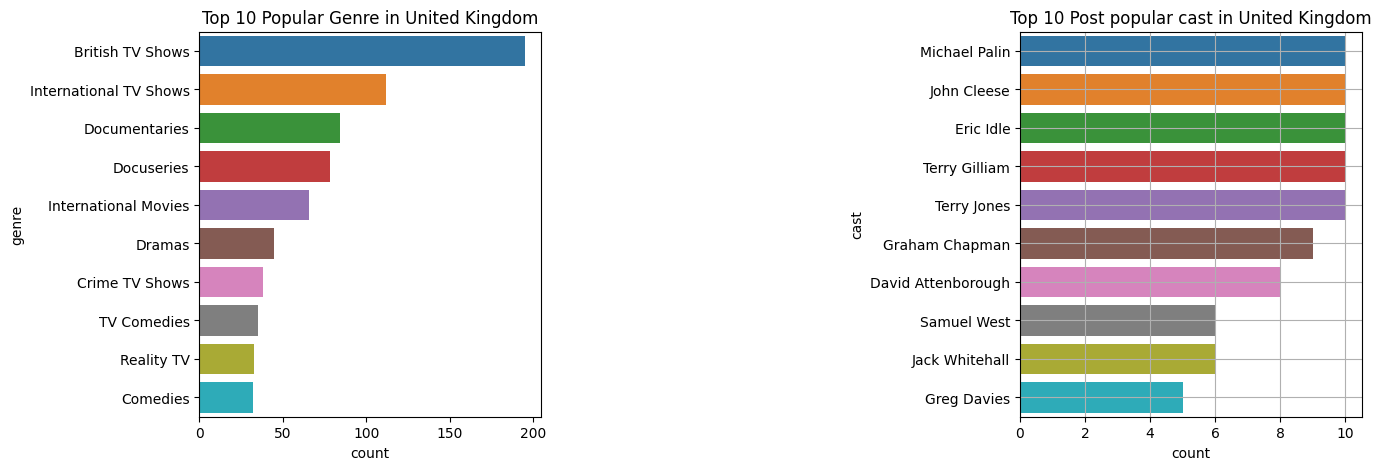

********************************************


In [84]:
def country_level_analysis( country):

    # extract the values of genre
    genre= data[data['country'] == country]["listed_in"]

    # join all the values of the list 
    genre=", ".join(genre)

    # clean the nosy values
    genre=genre.replace(',, ',', ')

    # split the string 
    genre=genre.split(", ")

    # cout the number of times word repeats using Counter function 
    genre= list(Counter(genre).items())


    genre_counter = pd.DataFrame(genre, columns= ['genre', 'count']) 

    # sort by ascending order 
    genre_counter = genre_counter.sort_values('count', ascending= False) 






    # extract the values of cast
    cast= data[data['country'] == country]["cast"]

    # join all the values of the list 
    cast=", ".join(cast)

    # clean the nosy values
    cast=cast.replace(',, ',', ')

    # split the string 
    cast=cast.split(", ")

    # cout the number of times word repeats using Counter function 
    cast= list(Counter(cast).items())


    cast_counter = pd.DataFrame(cast, columns= ['cast', 'count']) 

    # sort by ascending order 
    cast_counter = cast_counter.sort_values('count', ascending= False)

    # drop the 'No-Data'
    cast_counter.drop(index= cast_counter[cast_counter['cast'] == 'No Data'].index, inplace= True)




    

    plt.figure(figsize= (15, 5))

    plt.subplot(1, 3, 1)
    sns.barplot(data= genre_counter[:10] , x = 'count', y = 'genre')
    plt.title(f'Top 10 Popular Genre in {country}')

    plt.subplot(1, 3, 3)
    sns.barplot(data= cast_counter[:10] , x = 'count', y = 'cast')
    plt.title(f'Top 10 Post popular cast in {country}')
    plt.grid(True)
    plt.show()

    print('********************************************')


for country in top_10_country_show_release.index[:3].to_list():
    country_level_analysis(country)

In The USA the popular genera seemsto be Drama, Comedies and Documentary. Some of the popular featured cast are JulieTejwani, Samuel L JAckson, Adam Sandler 

In India the popular genera are International Movies, Drama, Comedies. Some of the popular featured cast are Anupam Kher, Shah Rukh Khan and Neseerudin Sha

In the UK we go British TV Shows, International TV Shows and Documentary as a Popular Genre. Michael Palin, Johan Cleese and Eric idle as some of the popular cast mambers 

We see that the Genera of the content variesin regards to the region 

### Top 10 Directors On Netflix :-

In [18]:
top_10_director = data['director'].value_counts().sort_values(ascending= False)[1: 11]
top_10_director = top_10_director.reset_index()
top_10_director


,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


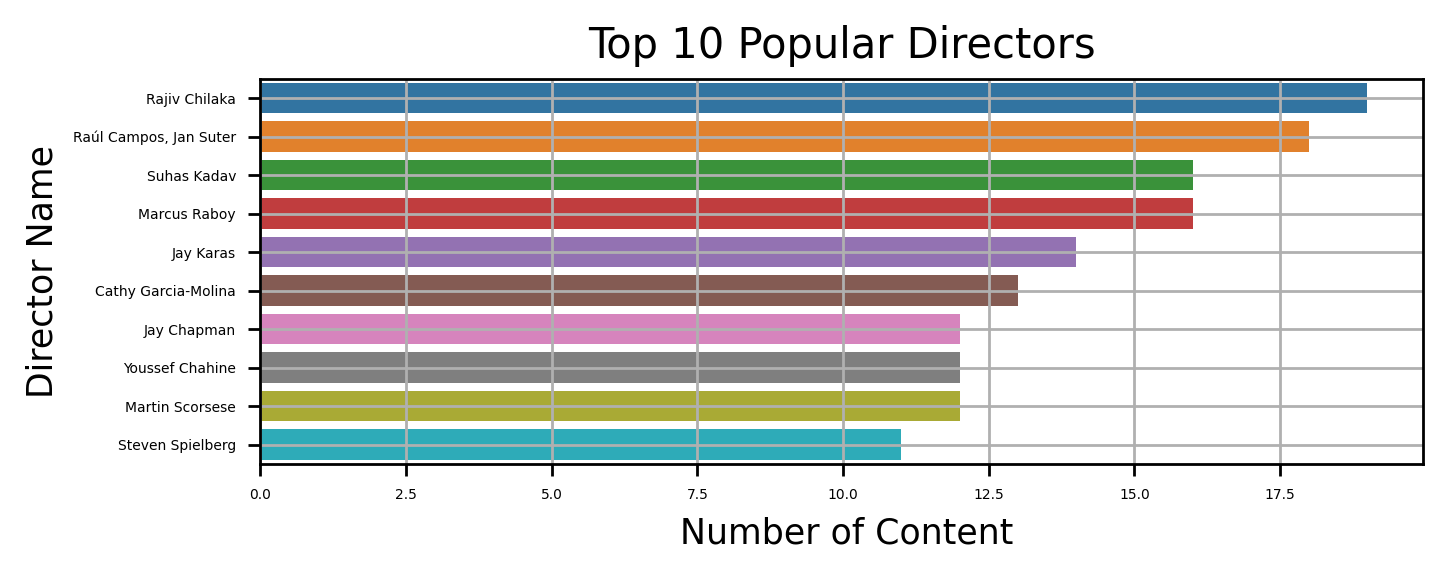

In [19]:
plt.figure(figsize=(6,2), dpi= 250)
sns.barplot(data= top_10_director, y = 'index', x = 'director')
plt.xticks( fontsize=4 )
plt.yticks( fontsize=4 )
plt.xlabel(' Number of Content')
plt.ylabel('Director Name')
plt.title('Top 10 Popular Directors')
plt.grid(True)
plt.show()

some of the popular directors whoes content are on netflix are Rajiv Chilak, Raul Compos, Marcus Raboy

### Netflix Content analysis based on Duration

In [17]:
# select the data frame 
data_movies = data[ data['type'] == 'Movie']

# convert duration to int
data_movies['duration'] = data_movies['duration'].apply( lambda x : int(x.replace('min', '')) )

# data preview
data_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021


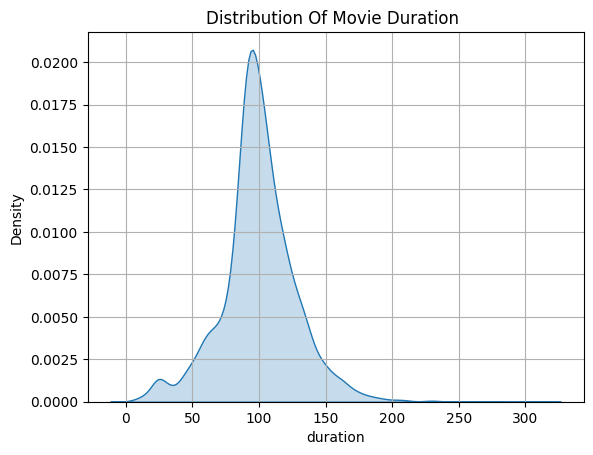

In [18]:
sns.kdeplot(data=data_movies['duration'], shade=True)
plt.title('Distribution Of Movie Duration ')
plt.grid(True)
plt.show()

mejority of the movie content seems to range between 75 Min to 120 Min. i.e., the average time span for the movies

In [19]:
# select the data frame 
data_tv_show = data[ data['type'] == 'TV Show']

data_tv_show.duration = data_tv_show.duration.apply( lambda x : x.replace('Seasons', '') )
data_tv_show.duration = data_tv_show.duration.apply( lambda x : x.replace('Season', '') )
data_tv_show['duration'] = data_tv_show.duration.astype('int')

data_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name,year
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021


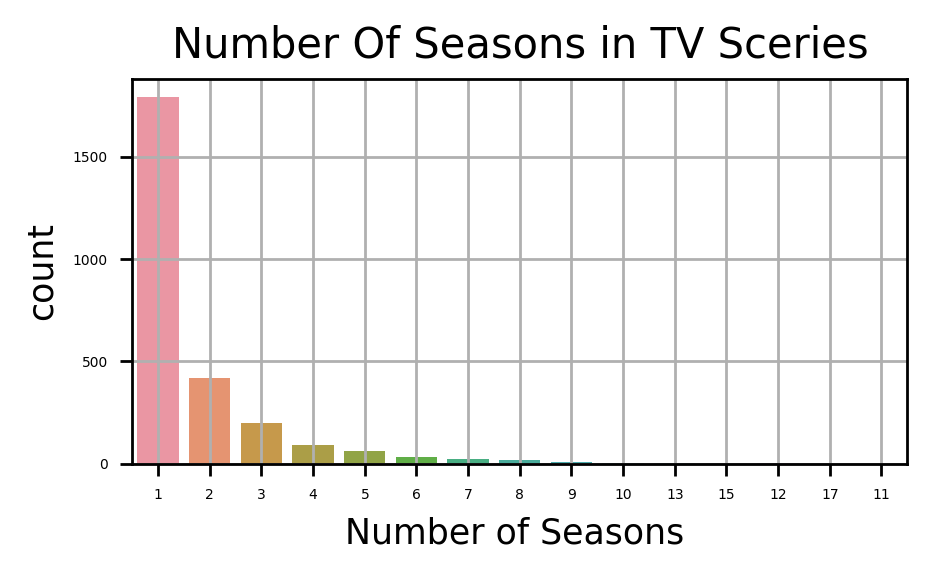

In [20]:
plt.figure(figsize=(4, 2), dpi=250)
sns.countplot(data= data_tv_show, x = 'duration', order= data_tv_show.duration.value_counts().index)
plt.xlabel('Number of Seasons ')
plt.xticks( fontsize=4 )
plt.yticks( fontsize=4 )
plt.title('Number Of Seasons in TV Sceries')
plt.grid(True)
plt.show()

### Content distribution based on Rating 

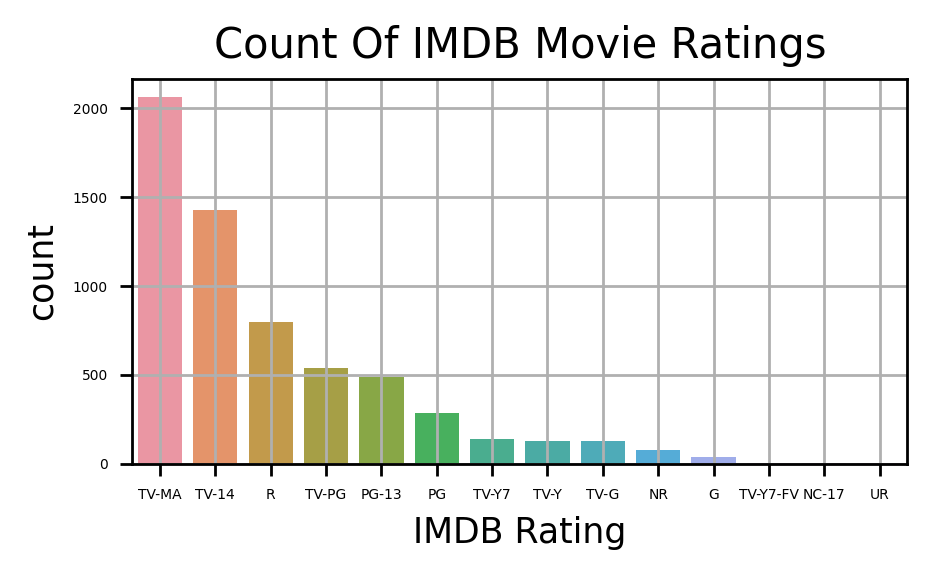

In [21]:
plt.figure(figsize=(4, 2), dpi= 250)
sns.countplot(data= data_movies, x = 'rating', order= data_movies.rating.value_counts().index)
plt.xlabel('IMDB Rating')
plt.xticks(fontsize=4 )
plt.yticks( fontsize=4 )
plt.title('Count Of IMDB Movie Ratings')
plt.grid(True)
plt.show()

from the above figure we see that 

The biggest count of movies are created with the 'TV-MA' rating. The TV Parental Guidelines award the classification "TV-MA" to a television show that is intended solely for adult audiences.

The second largest is 'TV-14,' which stands for programming that may be unsuitable for minors under the age of 14.

The third most common is the well-known 'R' rating.

An R-rated film is a film that has been judged as having material which may be inappropriate for minors under the age of 17 by the Motion Picture Association of America; the MPAA notes "Under 17 requires accompanying parent or adult guardian".

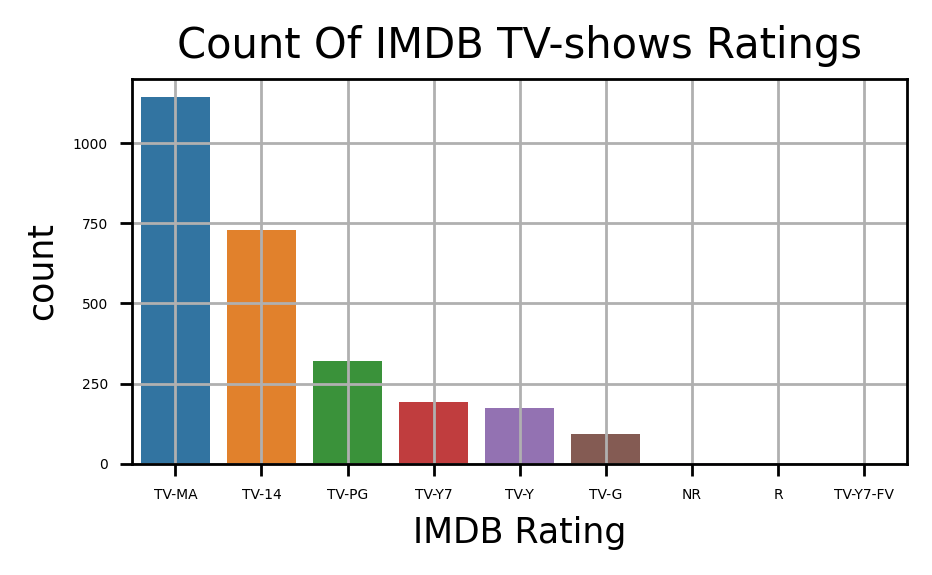

In [25]:
plt.figure(figsize=(4, 2), dpi=250)
sns.countplot(data= data_tv_show, x = 'rating', order= data_tv_show.rating.value_counts().index)
plt.xlabel('IMDB Rating')
plt.xticks(fontsize=4 )
plt.yticks( fontsize=4 )
plt.title('Count Of IMDB TV-shows Ratings')
plt.grid(True)
plt.show()

<Figure size 800x800 with 0 Axes>

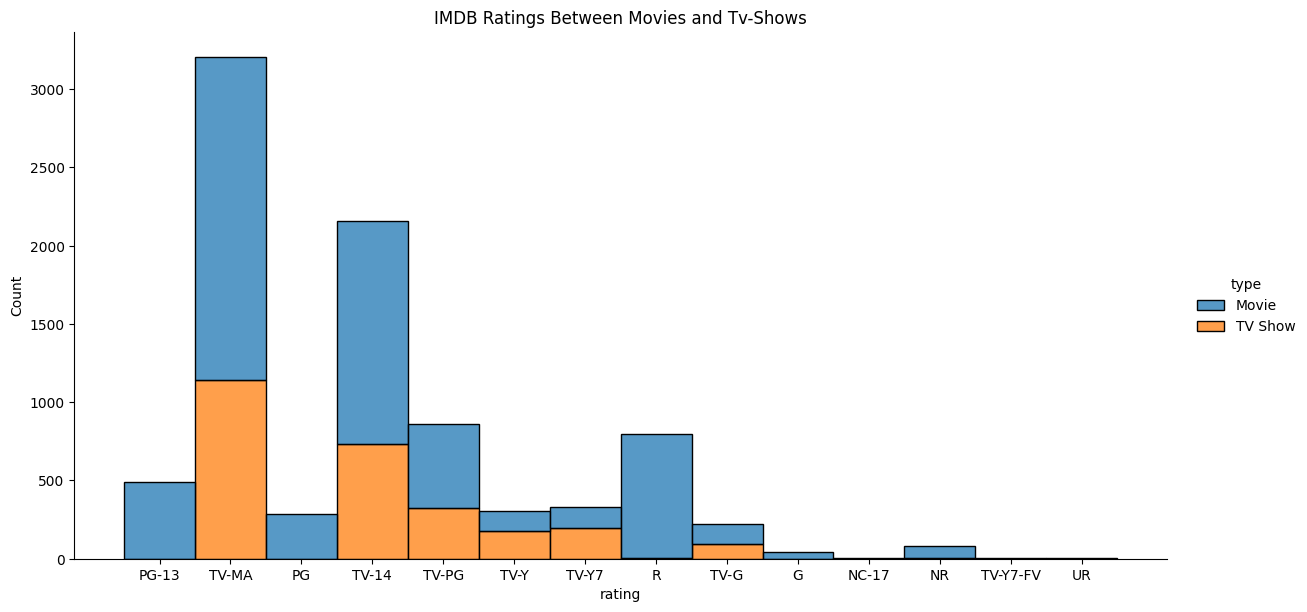

In [85]:
plt.figure(figsize=(8, 8) )
sns.displot(data = data, x = 'rating', hue= 'type', multiple="stack", aspect= 2, height= 6)
plt.title('IMDB Ratings Between Movies and Tv-Shows')
plt.xticks(fontsize= 10)
plt.yticks( fontsize=10 )
plt.show()

TV-MA Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
Most Of The Content On Neflix is For Mature Audience Above 17 year old.

### Moives And Tv Show's Year-wise Trends :

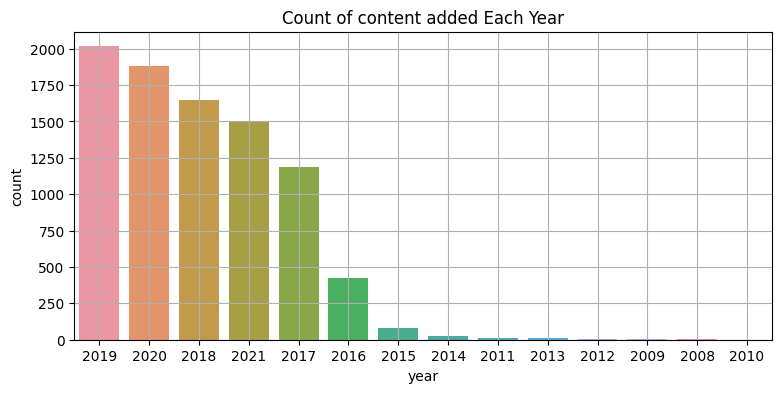

In [38]:
## Year analysis 

plt.figure(figsize=(9, 4))
sns.countplot(data= data, x = 'year', order= data.year.value_counts().index)
plt.grid(True)
plt.title('Count of content added Each Year')
plt.show()

from the above analysis, we see that in 2019 majority of the content was added to netflix. but there has been a slight dip in the amount of content added to Netflix

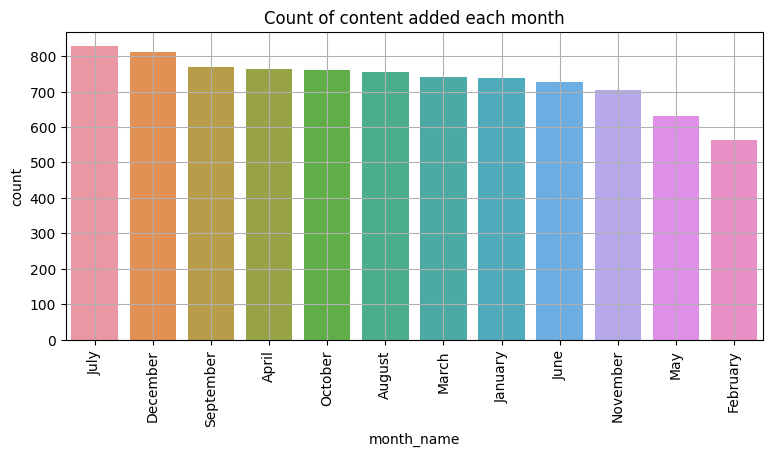

In [29]:

## Month analysis 

plt.figure(figsize=(9, 4))
sns.countplot(data= data, x = 'month_name', order= data.month_name.value_counts().index)
plt.xticks(  rotation = 90)
plt.grid(True)
plt.title('Count of content added each month')
plt.show()

Feb and May are best time to release new contnet as the competition is less 

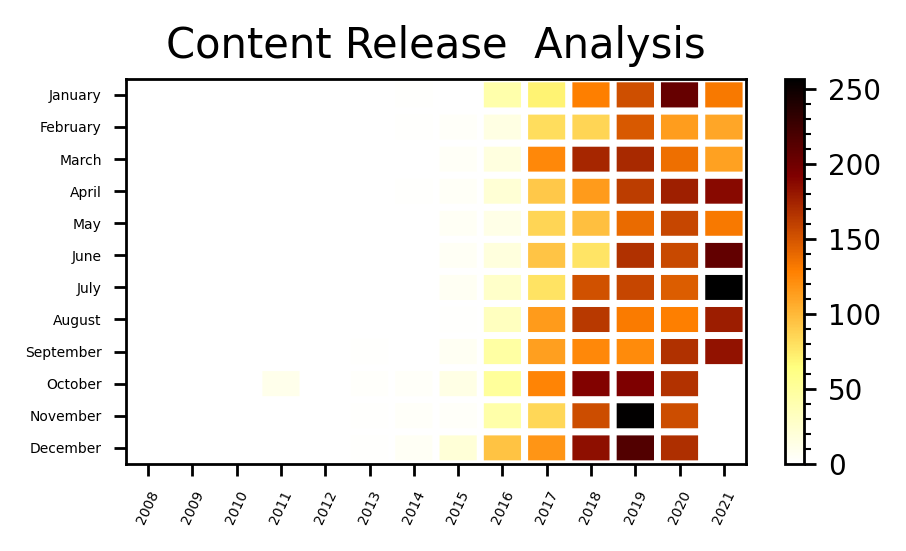

In [27]:


month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
date_analysis = data.groupby('year')['month_name'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(4, 2), dpi=250)
plt.pcolor(date_analysis, cmap="afmhot_r", edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(date_analysis.columns), 1), date_analysis.columns, fontsize=4, rotation = 65)
plt.yticks(np.arange(0.5, len(date_analysis.index), 1), date_analysis.index, fontsize=4 )

plt.title('Content Release  Analysis')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

<p>

from the above image If the latest year 2021 is considered, Frbruary and March were the months when comparatively much less content was released. Therefore, these months may be a good choice for the success of a new release! Over the time span of 2008 to 2021 we see that in February Lease number of movies were relesed  
</p>

### categorise the ccontent based on the Year content was released 

 3 most recently  release movie contnet added to netflix ['Charming', 'Rurouni Kenshin: The Beginning', 'African America']
 3 most oldest released movies contnet added to netflix ['Prelude to War', 'The Battle of Midway', 'WWII: Report from the Aleutians']


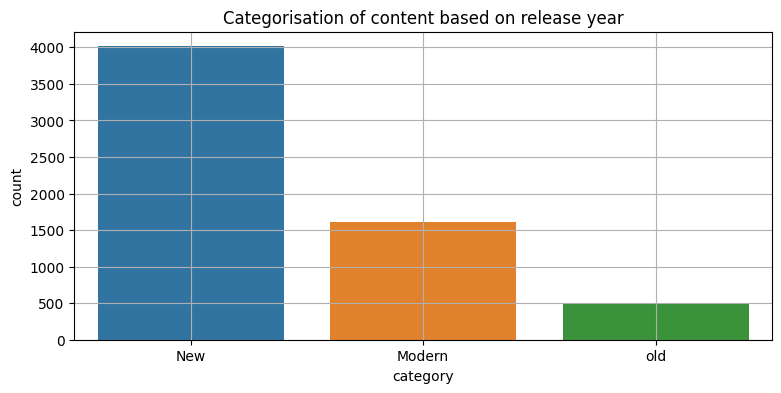

In [79]:
"""
we will categorise movies into 3 categories based on whhen they were released
1. old if release before 2000
2. Modern if released between 2000 and 2014
3. New if released after 2015
"""

print(f" 3 most recently  release movie contnet added to netflix { data[data['type'] == 'Movie'].sort_values(by= 'release_year').tail(3)['title'].values.tolist() }")
print(f" 3 most oldest released movies contnet added to netflix { data[data['type'] == 'Movie'].sort_values(by= 'release_year').head(3)['title'].values.tolist() }")

movie_release_Category =  data[data['type'] == 'Movie'].release_year.apply(lambda x : 'old' if x <= 2000 else ( 'Modern' if (x > 2000 and x <= 2014)  else 'New' ) )
df = pd.DataFrame(data= movie_release_Category.values,
              index= data[data['type'] == 'Movie'].release_year.values, 
              columns= ['category'])


plt.figure(figsize=(9, 4))
sns.countplot(data= df, x = 'category', order= df.category.value_counts().index)
plt.grid(True)
plt.title('Categorisation of content based on release year')
plt.show()

Old movies aded on to the netflix seem to revolve around war and the documentary of war 

new movies added seems to have a mixtureof romance, drama and action 

 3 most recenty release TV contnet added to netflix ['Castlevania', 'Use For My Talent', 'Blood & Water']
 3 most oldest release TV contnet added to netflix ['Pioneers: First Women Filmmakers*', 'Five Came Back: The Reference Films', 'Pioneers of African-American Cinema']


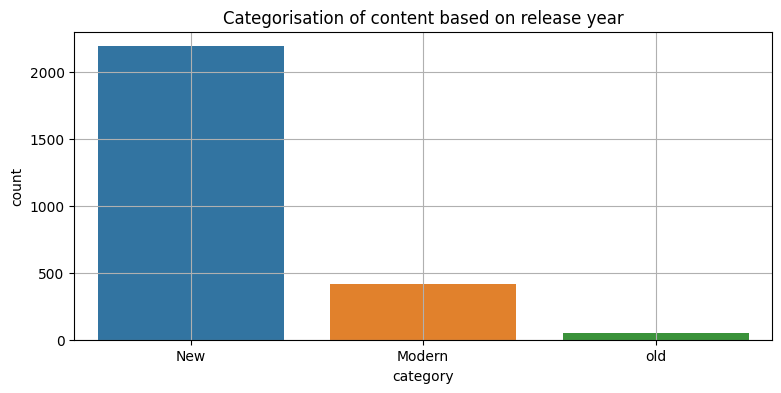

In [80]:
print(f" 3 most recenty release TV contnet added to netflix { data[data['type'] == 'TV Show'].sort_values(by= 'release_year').tail(3)['title'].values.tolist() }")
print(f" 3 most oldest release TV contnet added to netflix { data[data['type'] == 'TV Show'].sort_values(by= 'release_year').head(3)['title'].values.tolist() }")

TV_Show_release_Category =  data[data['type'] == 'TV Show'].release_year.apply(lambda x : 'old' if x <= 2000 else ( 'Modern' if (x > 2000 and x <= 2014)  else 'New' ) )

df = pd.DataFrame(data= TV_Show_release_Category .values,
              index= data[data['type'] == 'TV Show'].release_year.values, 
              columns= ['category'])


plt.figure(figsize=(9, 4))
sns.countplot(data= df, x = 'category', order= df.category.value_counts().index)
plt.grid(True)
plt.title('Categorisation of content based on release year')
plt.show()

we see a similar trend in both movies and TV series added to Netflix. More of the new movies are added to the libraryes compared to old ones. 

# Business Insights 

<ol>
<li> Throughout the years, Netflix has significantly increased the quantity of material it creates. Looking at the amount of new titles added each year in the dataset demonstrates this. </li>
<li> The majority of Netflix content is movies, with TV series accounting for a lesser proportion. TV series, on the other hand, have longer runtimes and may be more popular with viewers hoping for a lengthier engagement.  </li>
<li> Netflix content varies by area, with some nations having a more restricted range of content than others. Depending on the tastes of local audiences, this may have an influence on the company's potential to grow in specific locations. </li>
<li> Some genres of content are more popular than others, with drama being the most popular genre for Netflix movies and TV episodes. Knowing which genres are the most popular might assist the organisation in making better educated judgements about what material to provide. </li>
<li> The dataset contains information on the countries where material is available, which can help you comprehend the company's global reach. Netflix has swiftly expanded its worldwide footprint in recent years, and the data may be used to pinpoint locations where the firm may be able to expand further.</li>
</ol>
<br>
Overall, the Netflix dataset has a plethora of information that may be utilised to better understand the company's content strategy and worldwide reach. Businesses may receive useful insights into what sorts of content are most popular, how the firm has evolved over time, and where it may be able to expand in the future by analysing data.

#  Recommendations

<ol>
<li>Focus on producing more content in popular genres. By analyzing the data, businesses can identify which genres are most popular and focus on producing more content in those areas to attract and retain viewers.</li>
<li>Use data to inform decisions about global expansion. By analyzing which regions have the most popular content, businesses can use this information to inform decisions about where to expand next.</li>
<li>Create longer TV shows to keep viewers engaged. Although movies are more common on Netflix, TV shows with longer runtimes may be more popular with viewers who are looking for a longer engagement. Businesses can use this information to inform decisions about which types of content to produce.</li>
<li>Pay attention to content ratings. The dataset includes information on the ratings of different titles, which can help businesses make decisions about what types of content to produce and how to market it and there targetted audience.</li>
<li>Continuously add new content to the platform. The data shows that Netflix has been steadily increasing the amount of content it produces over time, and this strategy has likely contributed to the company's success. Businesses can use this information to inform their own content strategies and focus on continuously adding new content to keep viewers engaged.</li>
<li> To target elderly viewers netflix should consider added more of old and modern content to there library </li>
</ol>
<br>
Overall, companies may obtain significant insights on how to generate and promote content that will resonate with viewers, as well as how to increase their reach and build their audience, by utilising the data accessible in the Netflix dataset.